In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
DJIA_df = pd.read_csv("DJIA_table.csv")
DJIA_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [3]:
DJIA_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
DJIA_df_data = DJIA_df[['Date', 'Open', 'Close']]

In [5]:
train_size = 0.8

dataset_train = DJIA_df_data.iloc[:round(train_size*len(DJIA_df_data)), :]
dataset_test = DJIA_df_data.iloc[round(train_size*len(DJIA_df_data)):, :]

In [6]:
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
len(training_set_scaled)

1591

In [9]:
X_train = list()
y_train = list()
for i in range(60, 1590):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
len(dataset_test)

398

In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [50]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
48/48 [==============================] - 15s 110ms/step - loss: 0.0399 - accuracy: 0.0013
Epoch 2/50
48/48 [==============================] - 5s 110ms/step - loss: 0.0059 - accuracy: 0.0013
Epoch 3/50
48/48 [==============================] - 5s 111ms/step - loss: 0.0056 - accuracy: 0.0013
Epoch 4/50
48/48 [==============================] - 5s 109ms/step - loss: 0.0067 - accuracy: 0.0013
Epoch 5/50
48/48 [==============================] - 5s 110ms/step - loss: 0.0050 - accuracy: 0.0013
Epoch 6/50
48/48 [==============================] - 6s 117ms/step - loss: 0.0050 - accuracy: 0.0013
Epoch 7/50
48/48 [==============================] - 5s 111ms/step - loss: 0.0052 - accuracy: 0.0013
Epoch 8/50
48/48 [==============================] - 6s 119ms/step - loss: 0.0049 - accuracy: 0.0013
Epoch 9/50
48/48 [==============================] - 6s 120ms/step - loss: 0.0044 - accuracy: 0.0013
Epoch 10/50
48/48 [==============================] - 6s 118ms/step - loss: 0.0041 - accuracy: 0.001

In [51]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [52]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 367+91):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

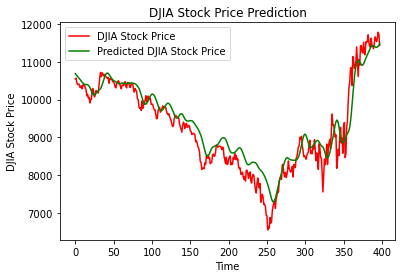

In [53]:
plt.plot(real_stock_price, color = 'red', label = 'DJIA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted DJIA Stock Price')
plt.title('DJIA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('DJIA Stock Price')
plt.legend()
plt.show()